# Answer 1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid search cross-validation (Grid Search CV) is a technique used in machine learning to tune hyperparameters of a model. The purpose of grid search CV is to systematically search through a predefined grid of hyperparameters and select the combination that yields the best performance on a validation set. 

Here's how grid search CV works:

1. **Define Hyperparameter Grid**:
   - Specify a grid of hyperparameters to search over. Each hyperparameter is assigned a range of values or a list of possible options.
   - For example, in a support vector machine (SVM) model, you might specify a grid for parameters like the choice of kernel (linear, polynomial, radial basis function), the regularization parameter (C), and the kernel coefficient (gamma).

2. **Define Performance Metric**:
   - Choose a performance metric (e.g., accuracy, precision, recall, F1-score) to evaluate the model's performance on the validation set.
   - The choice of metric depends on the specific problem and the desired characteristics of the model.

3. **Cross-Validation**:
   - Divide the training data into multiple folds (usually k folds) for cross-validation.
   - For each combination of hyperparameters in the grid:
     - Train the model on k-1 folds of the training data.
     - Evaluate the model's performance on the remaining fold (validation set).
     - Repeat this process k times, each time using a different fold as the validation set.
     - Compute the average performance metric across all folds.

4. **Select Best Hyperparameters**:
   - Identify the combination of hyperparameters that yielded the highest average performance metric during cross-validation.
   - This combination represents the optimal set of hyperparameters for the model.

5. **Train Final Model**:
   - Train the final model using the selected hyperparameters on the entire training dataset (including the validation set).

6. **Evaluate on Test Set**:
   - Evaluate the final model's performance on an independent test set to obtain an unbiased estimate of its generalization performance.

Grid search CV allows for an exhaustive search over a predefined set of hyperparameters, ensuring that the best combination is selected based on cross-validation performance. While grid search is computationally expensive, especially for models with many hyperparameters or large datasets, it is a widely used and effective method for hyperparameter tuning in machine learning.

# Answer 2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

Both Grid Search CV and Randomized Search CV are techniques used for hyperparameter tuning in machine learning, but they differ in their approach to exploring the hyperparameter space.

1. **Grid Search CV**:
   - In grid search CV, a predefined grid of hyperparameters is specified, and an exhaustive search is performed over all possible combinations of hyperparameters.
   - Grid search evaluates each combination using cross-validation and selects the combination that yields the best performance.
   - Grid search is computationally expensive, especially when the hyperparameter space is large or when searching over a wide range of values for each hyperparameter.

2. **Randomized Search CV**:
   - In randomized search CV, instead of exhaustively searching over all possible combinations of hyperparameters, a fixed number of random combinations is sampled from the hyperparameter space.
   - Each combination is evaluated using cross-validation, similar to grid search.
   - Randomized search is more efficient than grid search because it does not explore every possible combination but rather focuses on a random subset of combinations.
   - Randomized search is particularly useful when the hyperparameter space is large or when some hyperparameters are less important than others.

**When to Choose Grid Search CV over Randomized Search CV**:
- Grid search CV is suitable when:
  - The hyperparameter space is small and manageable.
  - You want to perform an exhaustive search over all possible combinations of hyperparameters.
  - Computational resources are sufficient to handle the computational cost associated with an exhaustive search.

**When to Choose Randomized Search CV over Grid Search CV**:
- Randomized search CV is suitable when:
  - The hyperparameter space is large or high-dimensional.
  - You want to reduce the computational cost of hyperparameter tuning.
  - There are many hyperparameters, some of which may be less important than others.
  - You want to avoid missing out on good hyperparameter configurations that may not be included in an exhaustive grid.

In summary, grid search CV is preferred for smaller hyperparameter spaces or when an exhaustive search is feasible, while randomized search CV is more efficient for exploring large or high-dimensional hyperparameter spaces. The choice between the two depends on the specific problem, computational resources, and desired trade-offs between exploration and computational cost.

# Answer 3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage refers to the situation where information from outside the training dataset is used to create a model, leading to overly optimistic performance estimates or incorrect conclusions. It occurs when features in the training data include information about the target variable that would not be available at the time of prediction. Data leakage can severely compromise the integrity and generalization ability of a machine learning model.

Data leakage is a problem in machine learning because it can result in models that perform unrealistically well on the training data but fail to generalize to unseen data. This can lead to incorrect decisions, wasted resources, and potentially harmful consequences in real-world applications.

Here's an example of data leakage:

Suppose you are building a model to predict customer churn for a subscription-based service. You have a dataset with various features such as customer demographics, usage patterns, and billing information. One of the features in the dataset is the "last_interaction_date," which indicates the date of the customer's last interaction with the service.

However, during data preprocessing, you inadvertently include the "last_interaction_date" feature in your model. As it turns out, customers who churned tend to have a longer duration since their last interaction compared to customers who did not churn. Therefore, the "last_interaction_date" feature contains direct information about the target variable (churn), making it a form of data leakage.

When you train your model using this feature, it learns to exploit the relationship between the "last_interaction_date" and churn, achieving high accuracy on the training data. However, when you deploy the model to predict churn for new customers, it fails to perform well because the "last_interaction_date" feature is not available at the time of prediction. The model's performance on unseen data is significantly worse than expected due to the data leakage, leading to unreliable predictions and potential business consequences.

To prevent data leakage in this scenario, you should carefully inspect all features to ensure they do not contain information about the target variable that would not be available at the time of prediction. In this case, removing the "last_interaction_date" feature from the model would prevent data leakage and ensure the model's generalization ability.

# Answer 4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is crucial for building reliable and generalizable machine learning models. Here are several strategies to prevent data leakage:

1. **Understand the Data and Domain**: Gain a thorough understanding of the dataset and the domain it represents. Understand the data collection process, the meaning of each feature, and how they relate to the target variable.

2. **Separate Training and Validation Sets**: Split the dataset into distinct training and validation sets before any preprocessing or feature engineering. Ensure that no information from the validation set is used during model training to avoid leakage.

3. **Feature Selection and Engineering**: Perform feature selection and engineering only on the training data. Avoid using features that contain information about the target variable that would not be available at the time of prediction. Features should be selected based on their relevance to the problem and their ability to generalize to unseen data.

4. **Temporal Splitting**: In time-series data, use temporal splitting to separate the dataset into training and validation sets based on time. Ensure that the validation set contains data that occur after the training data to simulate real-world scenarios where future data is unseen.

5. **Cross-Validation**: Use cross-validation techniques such as k-fold cross-validation to evaluate model performance. Ensure that each fold of the cross-validation preserves the temporal or spatial structure of the data to prevent leakage.

6. **Preprocessing Pipelines**: Use preprocessing pipelines to ensure that data preprocessing steps are applied consistently to both the training and validation sets. This prevents information leakage that may occur if preprocessing steps are applied separately to each set.

7. **Be Mindful of Data Sources**: When combining data from multiple sources, ensure that data from different sources is integrated appropriately. Be cautious of merging datasets that contain overlapping information, as this can introduce leakage.

8. **Regularization Techniques**: Regularization techniques such as L1 (Lasso) and L2 (Ridge) regularization can help prevent overfitting and reduce the risk of leakage by penalizing complex models with large coefficients.

9. **Audit Model Performance**: Regularly audit the model's performance on unseen data to detect any signs of leakage. Monitor performance metrics on validation or test sets to ensure that the model generalizes well to new data.

By following these strategies, practitioners can minimize the risk of data leakage and build machine learning models that are reliable, generalizable, and robust to unseen data.

# Answer 5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A confusion matrix is a table that summarizes the performance of a classification model by presenting the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model on a dataset. It provides a detailed breakdown of the model's predictions and the actual outcomes, allowing for the calculation of various performance metrics.

Here's how a confusion matrix is structured:

- **True Positive (TP)**: The number of instances correctly predicted as positive by the model.
- **True Negative (TN)**: The number of instances correctly predicted as negative by the model.
- **False Positive (FP)**: The number of instances incorrectly predicted as positive by the model (false alarm or Type I error).
- **False Negative (FN)**: The number of instances incorrectly predicted as negative by the model (miss or Type II error).

The confusion matrix is typically represented as follows:

```
             Predicted Positive   Predicted Negative
Actual Positive       TP                  FN
Actual Negative       FP                  TN
```

From the confusion matrix, various performance metrics can be calculated to assess the model's performance, including:

1. **Accuracy**: The proportion of correctly classified instances out of all instances. It's calculated as 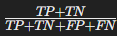.

2. **Precision (Positive Predictive Value)**: The proportion of true positive predictions out of all positive predictions made by the model. It's calculated as .

3. **Recall (Sensitivity or True Positive Rate)**: The proportion of true positive predictions out of all actual positive instances. It's calculated as 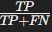.

4. **Specificity (True Negative Rate)**: The proportion of true negative predictions out of all actual negative instances. It's calculated as 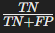.

5. **F1-score**: The harmonic mean of precision and recall, providing a balanced measure of the model's performance. It's calculated as .

6. **ROC Curve and AUC-ROC**: The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the ROC curve (AUC-ROC) provides an aggregate measure of the model's ability to discriminate between positive and negative classes.

Overall, the confusion matrix provides a comprehensive view of the model's performance, allowing practitioners to assess its strengths and weaknesses and make informed decisions about model improvements.

# Answer 6. Explain the difference between precision and recall in the context of a confusion matrix.

Precision and recall are performance metrics used to evaluate the effectiveness of a classification model, particularly in scenarios where there is class imbalance. They are calculated based on the counts of true positive (TP), false positive (FP), and false negative (FN) predictions from the confusion matrix.

- **Precision**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model. It focuses on the accuracy of the positive predictions. A high precision indicates that the model has a low false positive rate.

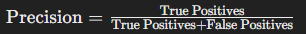

- **Recall**: Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances in the dataset. It focuses on the ability of the model to capture all positive instances. A high recall indicates that the model has a low false negative rate.

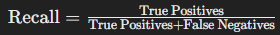

Here's a breakdown of the difference between precision and recall:

- **Precision**:
  - High precision indicates that the model makes fewer false positive predictions, meaning it is more accurate when it predicts a positive instance.
  - Precision is useful when the cost of false positives is high or when you want to ensure that the positive predictions made by the model are highly accurate.
  - Precision does not consider how many positive instances were missed by the model.

- **Recall**:
  - High recall indicates that the model captures a larger proportion of true positive instances, meaning it has a lower false negative rate.
  - Recall is useful when it is important to identify as many positive instances as possible, even if some false positives are included.
  - Recall does not consider the number of false positive predictions made by the model.

In summary, precision and recall provide complementary insights into the performance of a classification model, with precision focusing on the accuracy of positive predictions and recall focusing on the model's ability to capture all positive instances. The choice between precision and recall depends on the specific goals and requirements of the problem at hand.

# Answer 7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Interpreting a confusion matrix allows you to understand the types of errors your model is making and gain insights into its performance. By examining the counts of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions, you can identify the following types of errors:

1. **True Positive (TP)**:
   - Instances correctly predicted as positive by the model.
   - These are the instances where the model correctly identified positive cases.

2. **False Positive (FP)**:
   - Instances incorrectly predicted as positive by the model.
   - These are the instances where the model incorrectly classified negative cases as positive.
   - False positives represent Type I errors or false alarms.

3. **True Negative (TN)**:
   - Instances correctly predicted as negative by the model.
   - These are the instances where the model correctly identified negative cases.

4. **False Negative (FN)**:
   - Instances incorrectly predicted as negative by the model.
   - These are the instances where the model incorrectly classified positive cases as negative.
   - False negatives represent Type II errors or misses.

Here's how you can interpret a confusion matrix to determine which types of errors your model is making:

- **High TP, Low FP**:
  - Indicates that the model is good at correctly identifying positive cases without making many false positive predictions.
  - The model has high precision and recall, indicating strong performance.

- **Low TP, High FP**:
  - Indicates that the model is incorrectly predicting many negative cases as positive.
  - The model has low precision and high false positive rate, suggesting that it may be overly sensitive or prone to false alarms.

- **High TN, Low FN**:
  - Indicates that the model is good at correctly identifying negative cases without missing many positive cases.
  - The model has high specificity and recall, indicating strong performance.

- **Low TN, High FN**:
  - Indicates that the model is incorrectly predicting many positive cases as negative.
  - The model has low sensitivity and high false negative rate, suggesting that it may be missing important positive instances.

By analyzing the distribution of predictions in the confusion matrix, you can gain insights into the strengths and weaknesses of your model and identify areas for improvement. Adjustments to the model's threshold or tuning of hyperparameters may be necessary to address specific types of errors and improve overall performance.

# Answer 8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

Several common metrics can be derived from a confusion matrix to evaluate the performance of a classification model. These metrics provide insights into various aspects of the model's performance, including accuracy, precision, recall, F1-score, specificity, and the area under the ROC curve (AUC-ROC). Here's how each metric is calculated:

1. **Accuracy**:
   - Accuracy measures the proportion of correctly classified instances out of all instances.
   - It's calculated as: .

2. **Precision (Positive Predictive Value)**:
   - Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
   - It's calculated as: 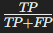.

3. **Recall (Sensitivity or True Positive Rate)**:
   - Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
   - It's calculated as: .

4. **Specificity (True Negative Rate)**:
   - Specificity measures the proportion of true negative predictions out of all actual negative instances in the dataset.
   - It's calculated as: .

5. **F1-score**:
   - The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.
   - It's calculated as: 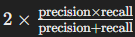.

6. **False Positive Rate (FPR)**:
   - FPR measures the proportion of false positive predictions out of all actual negative instances in the dataset.
   - It's calculated as: 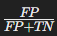.

7. **Area Under the ROC Curve (AUC-ROC)**:
   - The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
   - AUC-ROC provides an aggregate measure of the model's ability to discriminate between positive and negative classes.
   - It's calculated as the area under the ROC curve, with higher values indicating better performance.

These metrics provide valuable insights into different aspects of the model's performance and help evaluate its effectiveness for the specific task at hand. Depending on the requirements and objectives of the problem, different metrics may be prioritized. For example, precision may be more important in scenarios where false positives are costly, while recall may be more critical when it's crucial to capture all positive instances.

# Answer 9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The accuracy of a model, which measures the proportion of correctly classified instances out of all instances, is influenced by the values in its confusion matrix. The confusion matrix summarizes the model's predictions and actual outcomes for a binary classification task, providing insights into the model's performance across different classes.

Here's the relationship between the accuracy of a model and the values in its confusion matrix:

1. **True Positive (TP)**: Instances correctly predicted as positive by the model. TP contributes positively to both accuracy and precision metrics, as it represents correct predictions of the positive class.

2. **True Negative (TN)**: Instances correctly predicted as negative by the model. TN also contributes positively to accuracy, as it represents correct predictions of the negative class.

3. **False Positive (FP)**: Instances incorrectly predicted as positive by the model. FP contributes negatively to accuracy, as it represents incorrect predictions of the positive class.

4. **False Negative (FN)**: Instances incorrectly predicted as negative by the model. FN also contributes negatively to accuracy, as it represents incorrect predictions of the negative class.

The accuracy of the model is calculated as the sum of true positive (TP) and true negative (TN) predictions divided by the total number of instances (TP + TN + FP + FN). Therefore, accuracy depends on the correct classification of both positive and negative instances and is affected by the balance between TP, TN, FP, and FN in the confusion matrix.

In summary, the accuracy of a model is influenced by the values in its confusion matrix, with correct predictions (TP and TN) contributing positively and incorrect predictions (FP and FN) contributing negatively. Understanding the distribution of these values in the confusion matrix provides insights into the model's overall performance and helps interpret its accuracy metric in the context of the classification task.

# Answer 10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix can be a valuable tool for identifying potential biases or limitations in a machine learning model. Here are several ways to use a confusion matrix to detect such issues:

1. **Class Imbalance**:
   - Check for significant differences in the number of instances between classes (positive and negative) in the confusion matrix.
   - A large disparity in the number of instances between classes may indicate class imbalance, where the model may be biased towards the majority class.

2. **High False Positive Rate (FPR)**:
   - Evaluate the false positive rate (FP / (FP + TN)) in the confusion matrix, especially in scenarios where false positives are costly or undesirable.
   - A high false positive rate suggests that the model is incorrectly predicting negative instances as positive, leading to false alarms.

3. **High False Negative Rate (FNR)**:
   - Assess the false negative rate (FN / (TP + FN)) in the confusion matrix, particularly in scenarios where false negatives are critical.
   - A high false negative rate indicates that the model is failing to correctly predict positive instances, potentially missing important cases.

4. **Bias Towards Specific Classes**:
   - Examine whether the model consistently performs better or worse on certain classes compared to others.
   - Biases towards specific classes may indicate issues such as insufficient training data, imbalanced class distributions, or biases in the feature representation.

5. **Misclassification Patterns**:
   - Analyze the types of errors made by the model, such as confusing one class with another or consistently misclassifying certain instances.
   - Identify any systematic patterns or trends in misclassifications that may reveal underlying biases or limitations in the model.

6. **Performance Disparities Across Subgroups**:
   - Investigate whether the model's performance varies across different subgroups or demographic categories.
   - Disparities in performance across subgroups may indicate biases or limitations in the model's ability to generalize to diverse populations.

By carefully examining the information provided by the confusion matrix, practitioners can identify potential biases or limitations in their machine learning model and take appropriate steps to address them. This may involve collecting more representative data, adjusting model parameters, or applying fairness-aware techniques to mitigate biases and improve model performance across different groups.